# Hotel prices of Nordic hotels
### Scandic Hotels

**Scandic** is the largest Nordic hotel operator with a network of about 280 hotels with 58,000 rooms in operation and under development in the Nordic countries. Most hotels are located in **Norway, Sweden, Finland and Denmark**, but the company also has a presence in Germany and Poland.



*The project analyzes hotel prices by room category from **November 20th, 2022 - March 31st, 2023** for single person in four hotels:*

**- [Scandic Vulkan](https://www.scandichotels.com/hotels/norway/oslo/scandic-vulkan) – Oslo, Norway**

**- [Scandic Continental](https://www.scandichotels.com/hotels/sweden/stockholm/scandic-continental) – Stockholm, Sweden**

**- [Scandic Paasi](https://www.scandichotels.com/hotels/finland/helsinki/scandic-paasi) – Helsinki, Finland**

**- [Scandic CPH Strandpark](https://www.scandichotels.com/hotels/denmark/copenhagen/scandic-cph-strandpark) – Copenhagen, Denmark**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataframes

We will create a function to import the data. We want to **unpivot** data to make **data visualizations easier**. All room categories will be converted into rows.

In [2]:
def import_df(path, name):
    df = pd.read_excel(path)
    df['Hotel'] = name
    df = df.melt(id_vars=['Date', 'Hotel'], var_name = 'Category', value_name = 'Price')
    return df

sc_vulkan = import_df('Norway.xlsx', 'Scandic Vulkan')
sc_paasi = import_df('Finland.xlsx', 'Scandic Paasi')
sc_continental = import_df('Sweden.xlsx', 'Scandic Continental')
sc_cph = import_df('Denmark.xlsx', 'Scandic CPH Strandpark')

# Data Statistics and Visualization

In this part, it will be shown the **average, median, minimum and maximum** price for each hotel and each room category from November to March

In [3]:
# defining function to group data, calculate mean and plot it
def groupedMean(df, frequency):
    
    def grouped(df, frequency):
        df_grouped = pd.DataFrame(df.groupby([pd.Grouper(key='Date', freq=frequency), 
            pd.Grouper('Category')])['Price'].mean()).reset_index()
        return df_grouped
    df_grouped = grouped(df, frequency)
    df_grouped['Date'] = df_grouped['Date'].dt.month_name()


    def plotLine(df_grouped):
        ax = sns.lineplot(data = df_grouped, x='Date', y='Price', hue='Category')
        ax.set_title(str(df.Hotel.unique()).strip("['']") + ' - mean')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        return ax
    ax = plotLine(df_grouped)
    
    return ax

In [4]:
# defining function to group data, calculate median and plot it
def groupedMedian(df, frequency):
    
    def grouped(df, frequency):
        df_grouped = pd.DataFrame(df.groupby([pd.Grouper(key='Date', freq=frequency), 
            pd.Grouper('Category')])['Price'].median()).reset_index()
        return df_grouped
    df_grouped = grouped(df, frequency)
    df_grouped['Date'] = df_grouped['Date'].dt.month_name()


    def plotLine(df_grouped):
        ax = sns.lineplot(data = df_grouped, x='Date', y='Price', hue='Category')
        ax.set_title(str(df.Hotel.unique()).strip("['']") + ' - median')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        return ax
    ax = plotLine(df_grouped)
    
    return ax

In [5]:
# defining function to group data, calculate min value and plot it
def groupedMin(df, frequency):
    
    def grouped(df, frequency):
        df_grouped = pd.DataFrame(df.groupby([pd.Grouper(key='Date', freq=frequency), 
            pd.Grouper('Category')])['Price'].min()).reset_index()
        return df_grouped
    df_grouped = grouped(df, frequency)
    df_grouped['Date'] = df_grouped['Date'].dt.month_name()


    def plotLine(df_grouped):
        ax = sns.lineplot(data = df_grouped, x='Date', y='Price', hue='Category')
        ax.set_title(str(df.Hotel.unique()).strip("['']") + ' - min value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        return ax
    ax = plotLine(df_grouped)
    
    return ax

In [6]:
# defining function to group data, calculate max value and plot it
def groupedMax(df, frequency):
    
    def grouped(df, frequency):
        df_grouped = pd.DataFrame(df.groupby([pd.Grouper(key='Date', freq=frequency), 
            pd.Grouper('Category')])['Price'].max()).reset_index()
        return df_grouped
    df_grouped = grouped(df, frequency)
    df_grouped['Date'] = df_grouped['Date'].dt.month_name()


    def plotLine(df_grouped):
        ax = sns.lineplot(data = df_grouped, x='Date', y='Price', hue='Category')
        ax.set_title(str(df.Hotel.unique()).strip("['']") + ' - max value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        return ax
    ax = plotLine(df_grouped)
    
    return ax

In [7]:
def allFunctions(df,frequency):
    groupedMean(df, frequency)
    groupedMedian(df, frequency)
    groupedMin(df, frequency)
    groupedMax(df, frequency)
    
    return df

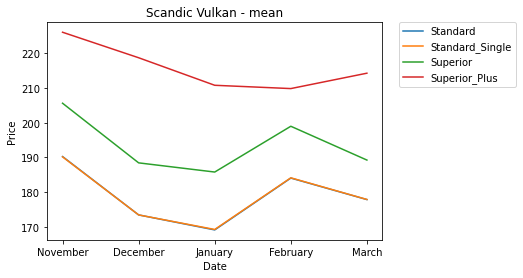

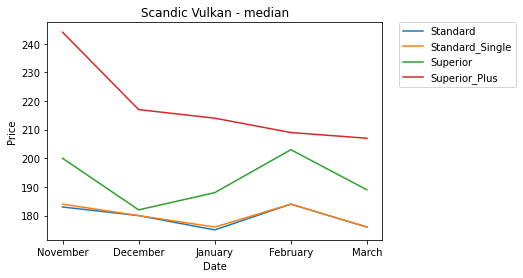

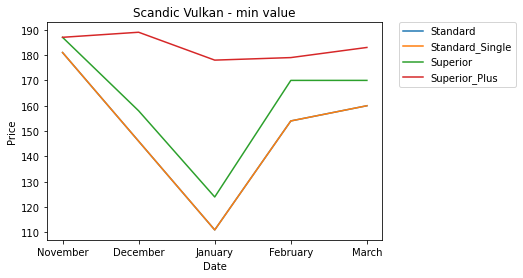

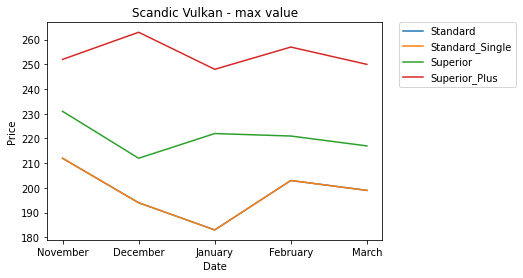

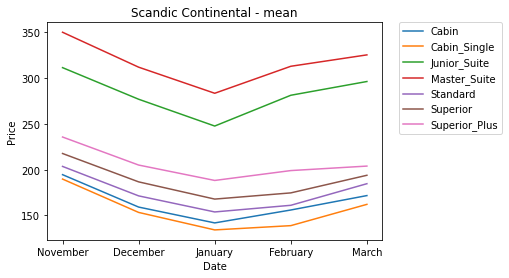

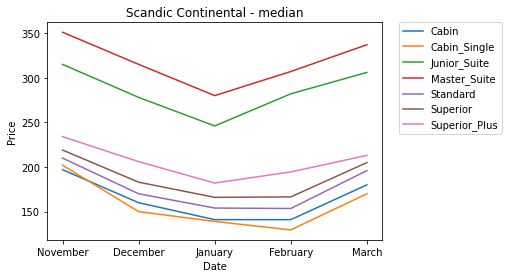

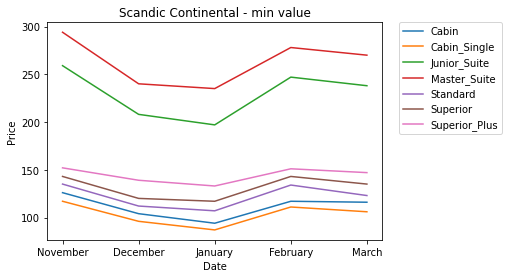

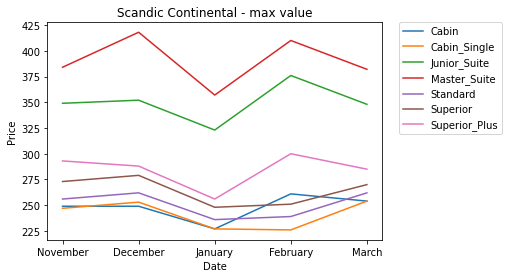

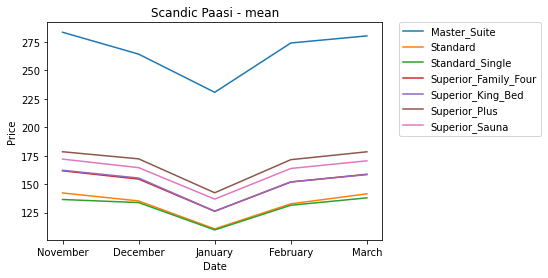

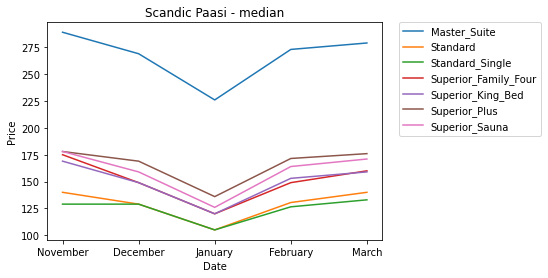

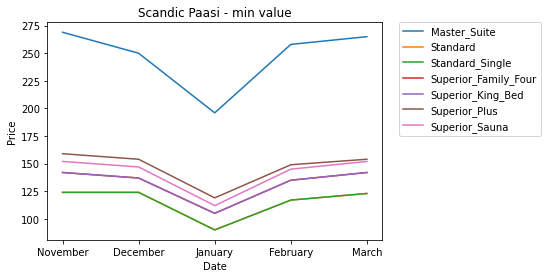

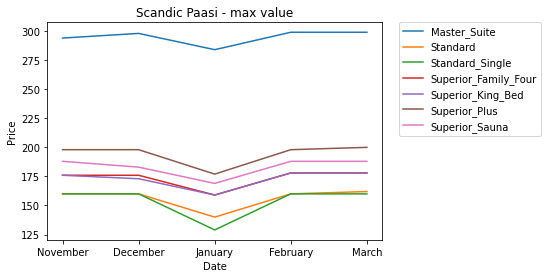

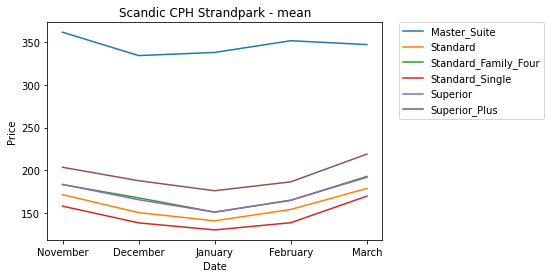

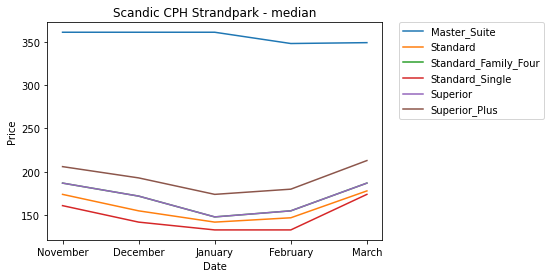

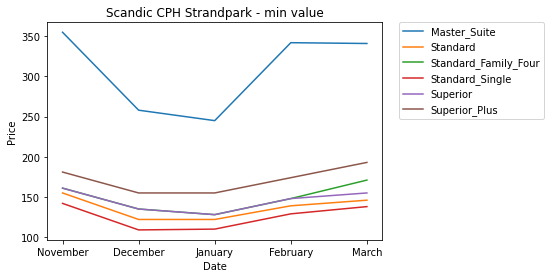

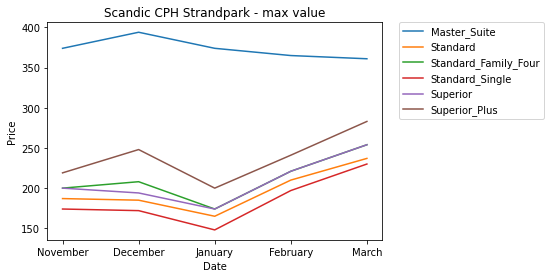

In [8]:
df_list = [sc_vulkan, sc_continental, sc_paasi, sc_cph]

for i in df_list:
    allFunctions(i, 'M')
    
# Note: Room categories 'Standard' and 'Standard_Single' for hotel Scandic Vulkan have the same price
# the line for Standard categories can't be seen because it overlaps with the line of Standard_Single